In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [3]:
titanic=sns.load_dataset("titanic")
titanic
features=["age","sex","pclass","fare","embarked"]
target=["survived"]
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
imp_med=SimpleImputer(strategy="median")
titanic[["age"]]=imp_med.fit_transform(titanic[["age"]])
imp_freq=SimpleImputer(strategy="most_frequent")
titanic[["embarked"]]=imp_freq.fit_transform(titanic[["embarked"]])
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
titanic["sex"]=le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])




In [11]:
X=titanic[features]
y=titanic[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=42
)

In [12]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [13]:
y_pred=model.predict(X_test)

In [14]:
print(accuracy_score(y_test,y_pred))

0.7686567164179104


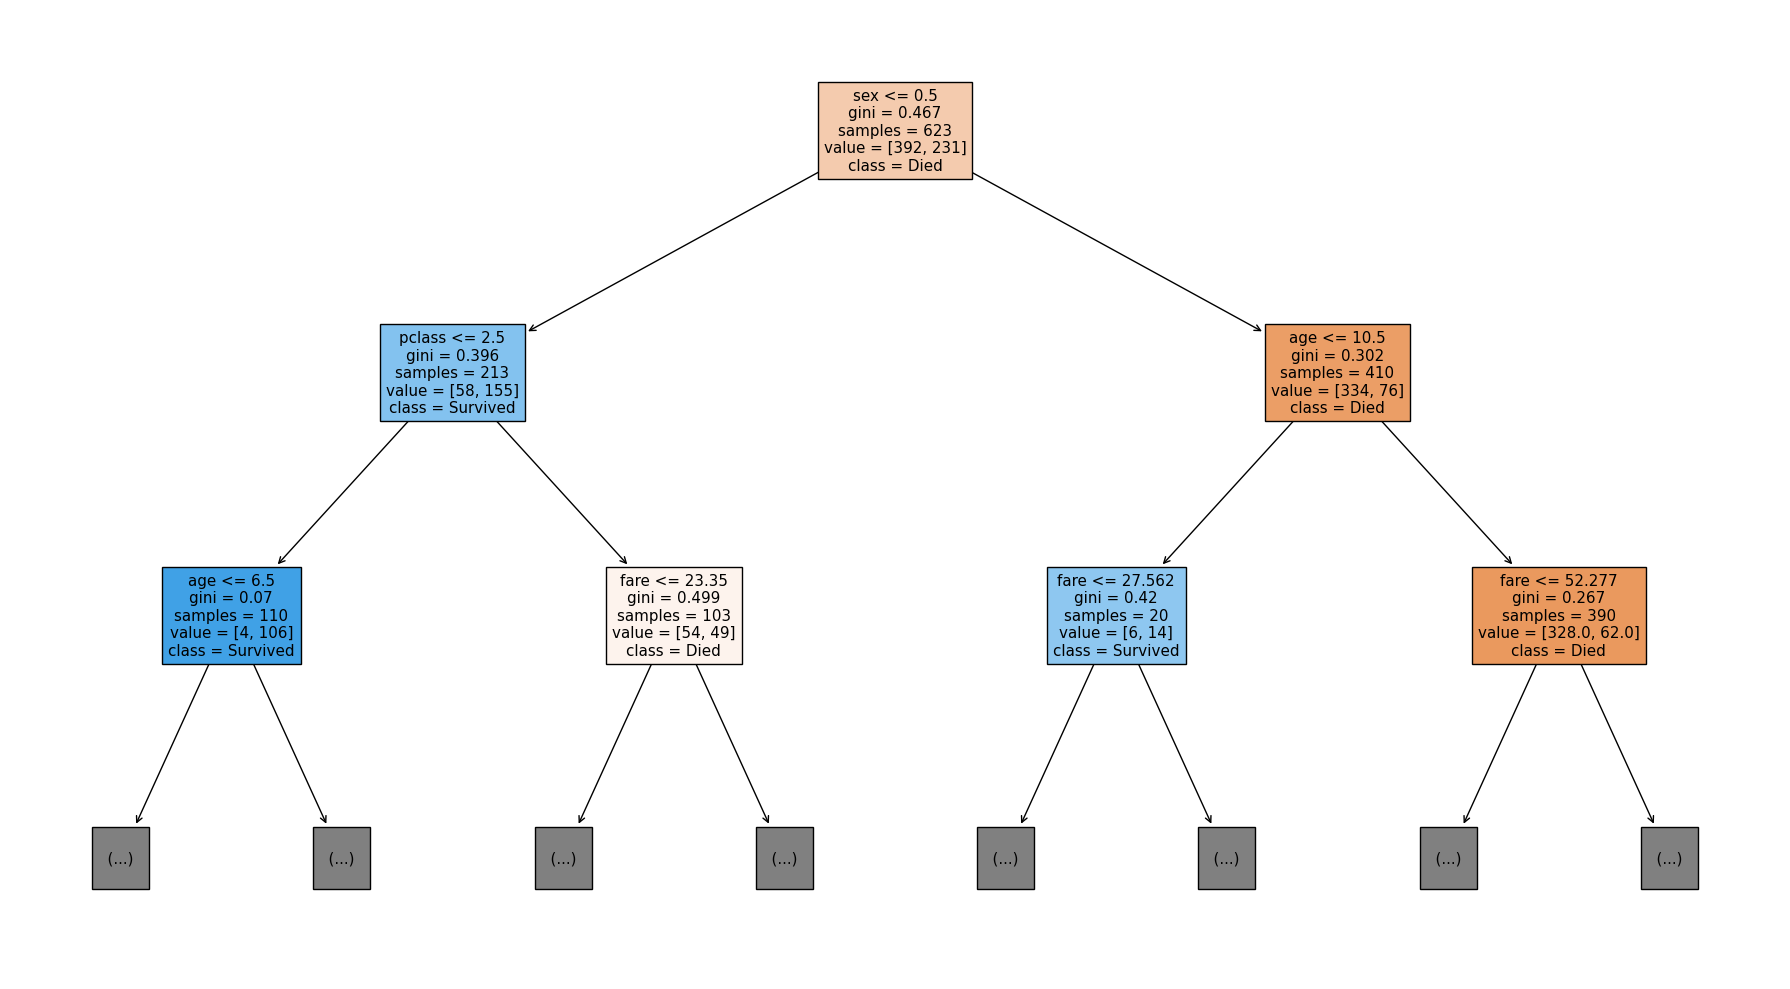

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True,
    max_depth=2
)

plt.tight_layout()
plt.show()

0.7910447761194029
0.7723880597014925
0.8059701492537313
0.8246268656716418
0.7985074626865671


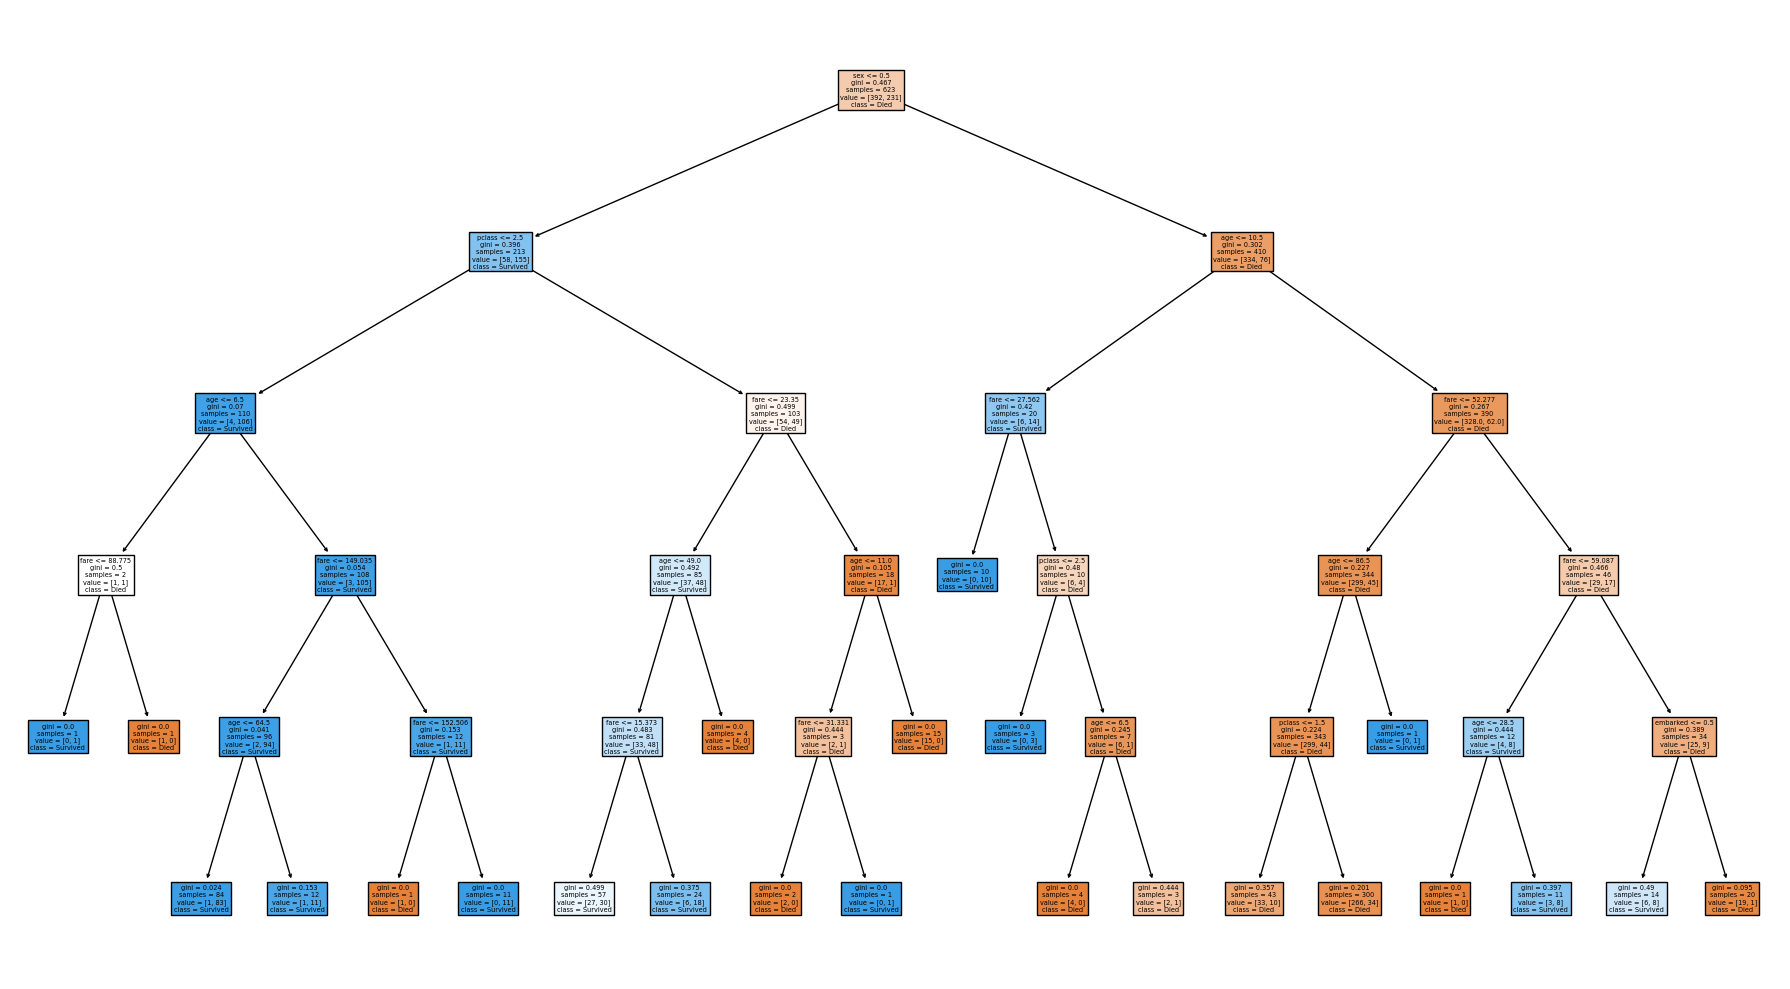

In [17]:
#Decision trees with pre-pruning

max_depth=[1,2,3,4,5]
for depth in max_depth:
     model=DecisionTreeClassifier(max_depth=depth)
     model.fit(X_train,y_train)
     y_pred=model.predict(X_test)
     print(accuracy_score(y_test,y_pred))


plt.figure(figsize=(18, 10))
plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died", "Survived"],
            filled=True
        )
        
        
plt.tight_layout()
plt.show()



In [18]:
#Post-pruning 

full_tree=DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
path=full_tree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path.ccp_alphas

print(ccp_alphas)

[0.         0.         0.00013376 0.00013376 0.00022931 0.00032103
 0.00048409 0.00053505 0.00053505 0.00053505 0.00062746 0.00064205
 0.00077709 0.00085607 0.00093633 0.00096308 0.00096308 0.00096308
 0.00099875 0.00101659 0.00104193 0.0010478  0.00107009 0.00109238
 0.00115927 0.0012352  0.00123729 0.00129646 0.00132211 0.00133563
 0.00133761 0.00137583 0.00137583 0.00139708 0.00143228 0.00144145
 0.00150482 0.00151596 0.00152184 0.00167202 0.00171215 0.00183444
 0.0019012  0.00195674 0.00214018 0.00233474 0.0024077  0.00260835
 0.00263292 0.00278606 0.00280169 0.00284379 0.00288925 0.00299625
 0.00302412 0.00431144 0.00495299 0.00577849 0.00589431 0.0074248
 0.01236198 0.01787674 0.04065074 0.1323581 ]


In [21]:
trees=[]

for alpha in ccp_alphas:
    model=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
    model.fit(X_train,y_train)
    trees.append((model,alpha))


In [22]:
best_acc=0
best_alpha = 0
for model, alpha in trees:
    curr_acc = model.score(X_test, y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha
        

In [25]:
best_model = DecisionTreeClassifier(ccp_alpha=best_alpha )
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0017121455323702516)

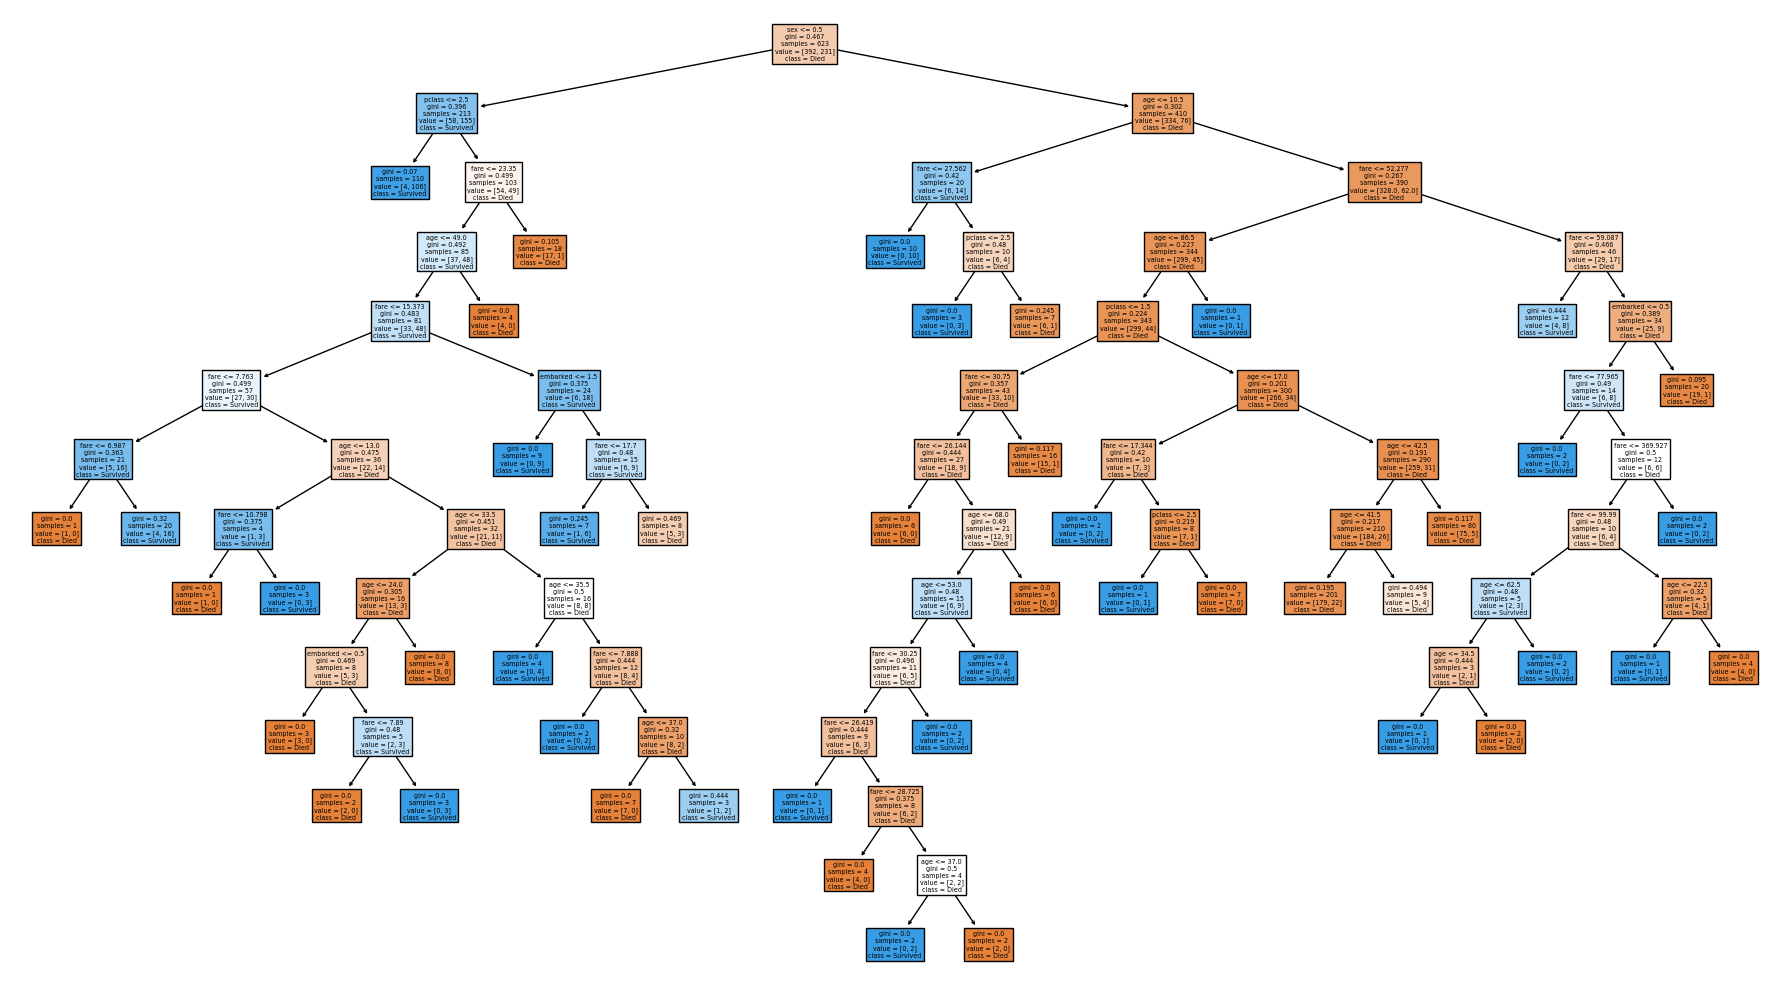

In [26]:
plt.figure(figsize=(18, 10))
plot_tree(
            best_model,
            feature_names=X.columns,
            class_names=["Died", "Survived"],
            filled=True
        )
        
        
plt.tight_layout()
plt.show()